In [ ]:
import numpy as np # linear algebra
import pandas as pd

# New Section

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score, mean_squared_error
from collections import Counter


In [ ]:
df=pd.read_csv('/Walmart Data Analysis and Forcasting (1).csv')

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.shape

(6435, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.isna().any()

,0
Store,False
Date,False
Weekly_Sales,False
Holiday_Flag,False
Temperature,False
Fuel_Price,False
CPI,False
Unemployment,False


In [ ]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
count = df['Holiday_Flag'].value_counts()
print("Count of Non-Holiday:0 and Holiday:1")
print("------------------------------------")
print(count)

Count of Non-Holiday:0 and Holiday:1
------------------------------------
Holiday_Flag
0    5985
1     450
Name: count, dtype: int64


In [ ]:
mininmum_weekly_sales = df['Weekly_Sales'].min()
print("Minimum Weekly Sales:", mininmum_weekly_sales)

Minimum Weekly Sales: 209986.25


In [ ]:
maximum_weekly_sales = df['Weekly_Sales'].max()
print("Maximum Weekly Sales:", maximum_weekly_sales)

Maximum Weekly Sales: 3818686.45


In [ ]:
df[df['Weekly_Sales'] == df['Weekly_Sales'].max()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


In [ ]:
store_minimum_weekly_sales = df.groupby('Store')['Weekly_Sales'].sum().idxmin()
print("Store with Minimum Weekly Sales:")
print("---------------------------------")
print(store_minimum_weekly_sales)

Store with Minimum Weekly Sales:
---------------------------------
33


In [ ]:
store_33_min_sale = df[df['Store'] == 33]['Weekly_Sales'].min()
print("Minimum Weekly Sale of store 33 is: ", store_33_min_sale)

Minimum Weekly Sale of store 33 is:  209986.25


In [ ]:
holiday_sale_33 = df[(df['Holiday_Flag']==1) & (df['Store'] == 33)]['Weekly_Sales'].min()
print("Minimum Weekly Sale on holiday in store 33 is: ", holiday_sale_33)

Minimum Weekly Sale on holiday in store 33 is:  215359.21


In [ ]:
non_holiday_sale_33 = df[(df['Holiday_Flag']==0) & (df['Store'] == 33)]['Weekly_Sales'].min()
print("Minimum weekly sale on non-holiday in store 33 is: ", non_holiday_sale_33)

Minimum weekly sale on non-holiday in store 33 is:  209986.25


In [ ]:
non_holiday_sale_33 = df[(df['Holiday_Flag']==0) & (df['Store'] == 33)]['Weekly_Sales'].max()
print("Maximum weekly sale on non-holiday in store 33 is: ",non_holiday_sale_33)

Maximum weekly sale on non-holiday in store 33 is:  331173.51


In [ ]:
holiday_sale_33 = df[(df['Holiday_Flag']==1) & (df['Store'] == 33)]['Weekly_Sales'].max()
print("Maximum weekly sale on holiday in store 33 is: ",holiday_sale_33)

Maximum weekly sale on holiday in store 33 is:  294882.83


In [ ]:
store_maximum_sale = df.groupby("Store")["Weekly_Sales"].sum().idxmax()
print("Store with maximum weekly_sale is: ", store_maximum_sale)

Store with maximum weekly_sale is:  20


In [ ]:
store_20_max_sale = df[df['Store'] == 20]['Weekly_Sales'].max()
print("Maximum Weekly Sale of store 20 is: ", store_20_max_sale)

Maximum Weekly Sale of store 20 is:  3766687.43


In [ ]:
holiday_sale_20 = df[(df['Holiday_Flag']==1) & (df['Store'] == 20)]['Weekly_Sales'].max()
print("Maximum weekly sale on holiday in store 20 is: ", holiday_sale_20)

Maximum weekly sale on holiday in store 20 is:  2906233.25


In [ ]:
non_holiday_sale_20 = df[(df['Holiday_Flag']==0) & (df['Store'] == 20)]['Weekly_Sales'].max()
print("Maximum weekly sale on non-holiday in store 20 is: ", non_holiday_sale_20)

Maximum weekly sale on non-holiday in store 20 is:  3766687.43


In [ ]:
df[df['Weekly_Sales'] == 3766687.43]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2763,20,24-12-2010,3766687.43,0,25.17,3.141,204.637673,7.484


In [ ]:
sales_sum = df.groupby('Holiday_Flag')[['Weekly_Sales']].sum()
print("Count of Weekly Sales on holiday and non-holiday are: ")
print('----------------------------------------------------')
sales_sum

Count of Weekly Sales on holiday and non-holiday are: 
----------------------------------------------------


,Weekly_Sales
Holiday_Flag,
0,6.231919e+09
1,5.052996e+08


In [ ]:
sales_avg = df.groupby('Holiday_Flag')[['Weekly_Sales']].mean()
print("Average Weekly Sales on holiday and non-holiday are: ")
print('----------------------------------------------------')
sales_avg

Average Weekly Sales on holiday and non-holiday are: 
----------------------------------------------------


,Weekly_Sales
Holiday_Flag,
0,1.041256e+06
1,1.122888e+06


In [ ]:
sales_avg_date = df.groupby('Date')[['Weekly_Sales']].mean()
print("Datewise Average Weekly Sales: ")
print("-----------------------------")
sales_avg_date


Datewise Average Weekly Sales: 
-----------------------------


,Weekly_Sales
Date,
01-04-2011,9.657554e+05
01-06-2012,1.072926e+06
01-07-2011,1.057300e+06
01-10-2010,9.386639e+05
02-03-2012,1.041356e+06
...,...
30-07-2010,9.917859e+05
30-09-2011,9.376851e+05
30-12-2011,1.023166e+06


In [ ]:
store_sales_avg = df.groupby('Store')[['Weekly_Sales']].mean()
print("Average Weekly Sales on Different Stores:")
print("----------------------------------------")
store_sales_avg

Average Weekly Sales on Different Stores:
----------------------------------------


,Weekly_Sales
Store,
1,1.555264e+06
2,1.925751e+06
3,4.027044e+05
4,2.094713e+06
5,3.180118e+05
6,1.564728e+06
7,5.706173e+05
8,9.087495e+05
9,5.439806e+05


In [ ]:
sales_temp = df.groupby(['Temperature', 'Store'])['Weekly_Sales'].mean()
sales_temp = sales_temp.reset_index()
sales_temp

,Temperature,Store,Weekly_Sales
0,-2.06,7,558027.77
1,5.54,26,817485.14
2,6.23,17,1083071.14
3,7.46,7,593875.46
4,9.51,40,775910.43
...,...,...,...
6325,99.22,28,1205884.98
6326,99.22,38,328336.85
6327,99.66,33,237095.82
6328,100.07,33,297753.49


In [ ]:
#Explanatory data Analysis

In [ ]:
fig = px.bar(count, x = count.index, y = 'count', title = 'Count of Holiday List')
fig.update_traces(marker_color = 'lightsalmon')
fig.show()

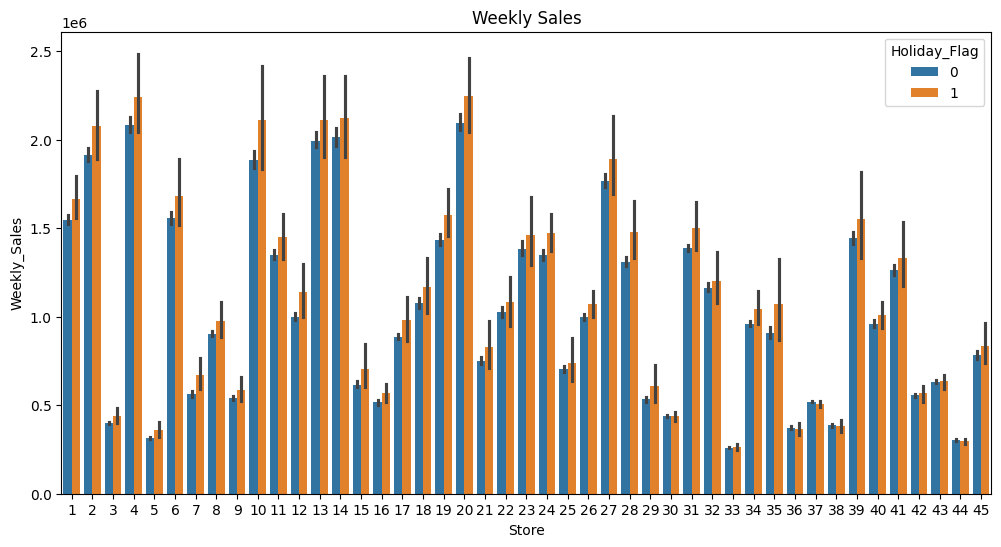

In [ ]:
plt.figure(figsize=(12, 6))  # Seting the figure size
sns.barplot(x='Store', y='Weekly_Sales', hue='Holiday_Flag', data=df)
plt.title('Weekly Sales')
plt.show()

In [ ]:
fig = px.line(sales_avg_date, x= sales_avg_date.index, y = 'Weekly_Sales', title = 'Datewise Average Weekly Sales')
fig.update_yaxes(title = 'Average Weekly Sales')

fig.show()

In [ ]:
fig = px.bar(store_sales_avg, x = store_sales_avg.index, y = 'Weekly_Sales', title = 'Storewise Average Weekly Sales')
fig.update_yaxes(title = 'Average Weekly Sales')
fig.update_xaxes(title = 'Stores')
fig.show()

In [ ]:
fig = px.pie(df, values = 'Weekly_Sales', names = 'Store', title = 'Storewise Percentage of Weekly Sales')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, height = 600)
fig.show()

In [ ]:
fig = px.scatter(sales_temp, x = 'Temperature', y = 'Weekly_Sales',color = 'Store',
                 title = 'Relation between Weekly Sales and Weather Conditon')
fig.update_layout(scattermode="group")
fig.show()

In [ ]:
cpi_avg = df.groupby('CPI')[['Weekly_Sales']].mean()
cpi_avg

,Weekly_Sales
CPI,
126.064000,1.016970e+06
126.076645,1.021504e+06
126.085452,1.056102e+06
126.089290,9.676731e+05
126.101935,1.040635e+06
...,...
227.018417,9.003098e+05
227.036936,8.916714e+05
227.169392,5.584648e+05


In [ ]:
fig = px.scatter(cpi_avg, x = cpi_avg.index, y = 'Weekly_Sales',
                 title = 'Relation between Weekly Sales and CPI' )
fig.update_traces(marker=dict(color = 'orchid',
                             line=dict(width=2,
                                        color='DarkSlateGrey')))
fig.update_yaxes(title = 'Average Weekly Sales')
fig.show()

In [ ]:
##The graph indicates that there is a weak negative relation between CPI and weekly sales.

In [ ]:
cpi_store_avg = df.groupby(['CPI','Store'])['Weekly_Sales'].mean().reset_index()

cpi_store_avg

,CPI,Store,Weekly_Sales
0,126.064000,4,2007050.75
1,126.064000,10,1962996.70
2,126.064000,12,928264.40
3,126.064000,13,1877592.55
4,126.064000,17,759995.18
...,...,...,...
6430,227.018417,8,900309.75
6431,227.036936,8,891671.44
6432,227.169392,9,558464.80
6433,227.214288,9,542009.46


In [ ]:
fig = px.scatter(cpi_store_avg, x = 'CPI', y = 'Weekly_Sales', color= 'Store',
                 title = 'Relation between Weekly Sales and CPI in Different Stores')
fig.update_yaxes(title = 'Average Weekly Sales')

fig.show()

In [ ]:
sales_unemp = df.groupby('Unemployment')[['Weekly_Sales']].mean()
sales_unemp

,Weekly_Sales
Unemployment,
3.879,2.147431e+06
4.077,2.138215e+06
4.125,1.200639e+06
4.145,1.184903e+06
4.156,1.212103e+06
...,...
13.975,9.520325e+05
14.021,8.956935e+05
14.099,8.835055e+05


In [ ]:
fig = px.scatter(sales_unemp, x = sales_unemp.index, y = 'Weekly_Sales',
                 title = 'Relation between Weekly Sales and Unemployment')
fig.update_layout(scattermode="group")
fig.show()

In [ ]:
##'There is a week negative relation between weekly sales and unemployment.'

In [ ]:
correlation_matrix = df[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
correlation_matrix

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020
Unemployment,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000


In [ ]:
fig = px.imshow(correlation_matrix, text_auto = True, aspect = 'auto',
               color_continuous_scale = 'tropic')
fig.update_layout(title = 'Correlation Matrix')
fig.show()

In [ ]:
Null_Hypothesis_H0 = "No difference in weeky-sales on holiday and non-holday"

Non_Null_Hypothesis_H1 = "There is difference in weeky-sales on holiday and non-holday"

In [ ]:
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales']
holiday_avg = holiday_sales.mean()
non_holiday_avg = non_holiday_sales.mean()
print("Average Weekly Sales on Holiday is: ", holiday_avg)
print("Average Weekly Sales on Non Holiday is: ", non_holiday_avg)

Average Weekly Sales on Holiday is:  1122887.8923555557
Average Weekly Sales on Non Holiday is:  1041256.3802088555


In [ ]:
# Perform independent sample t-test
t_statistic, p_value = stats.ttest_ind(holiday_sales, non_holiday_sales)

# Set the significance level (alpha)
alpha = 0.05

# Compute the degrees of freedom (df) (n_A-1)+(n_b-1)
degrees_of_freedom = len(holiday_sales)+len(non_holiday_sales)-2

# Calculate the critical t-value
# ppf is used to find the critical t-value for a two-tailed test
critical_t = stats.t.ppf(1 - alpha/2, degrees_of_freedom)

print("T-value:", t_statistic)
print("P-Value:", p_value)
print("Critical t-value:", critical_t)
# Decision
print('With T-value')
if np.abs(t_statistic) >critical_t:
    print('There is significant difference between weekly sales in holiday and non-holiday sales')
else:
    print('No significant difference found weekly sales in holiday and non-holiday sales')

print("------------")

print('With P-value:')
if p_value > alpha :
    print('No evidence to reject the null hypothesis that there is a significant difference between holiday and non-holiday weekly sales')
else:
    print('Evidence found to reject the null hypothesis that there is a significant difference between holiday and non-holiday weekly sales')

T-value: 2.9608919093259036
P-Value: 0.003078699263818616
Critical t-value: 1.9603328186835565
With T-value
There is significant difference between weekly sales in holiday and non-holiday sales
------------
With P-value:
Evidence found to reject the null hypothesis that there is a significant difference between holiday and non-holiday weekly sales


In [ ]:
store_20 = df[df['Store'] == 20][['Date','Weekly_Sales']]
print("Weekly Sales in Store 20:")
display(store_20)


Weekly Sales in Store 20:


,Date,Weekly_Sales
2717,05-02-2010,2401395.47
2718,12-02-2010,2109107.90
2719,19-02-2010,2161549.76
2720,26-02-2010,1898193.95
2721,05-03-2010,2119213.72
...,...,...
2855,28-09-2012,2008350.58
2856,05-10-2012,2246411.89
2857,12-10-2012,2162951.36
2858,19-10-2012,1999363.49


In [ ]:
fig = px.line(store_20, x = 'Date', y = 'Weekly_Sales', title = 'Weekly Sales in Store 20' )
fig.update_xaxes(title = 'Date', tickformat = '%d-%m-%Y')
fig.update_yaxes(title = 'Sales Count')
fig.show()

In [ ]:
store_33 = df[df['Store'] == 33][['Date','Weekly_Sales']]
print("Weekly Sales in Store 33:")
store_33

Weekly Sales in Store 33:


,Date,Weekly_Sales
4576,05-02-2010,274593.43
4577,12-02-2010,294882.83
4578,19-02-2010,296850.83
4579,26-02-2010,284052.77
4580,05-03-2010,291484.89
...,...,...
4714,28-09-2012,242813.51
4715,05-10-2012,265444.90
4716,12-10-2012,291781.15
4717,19-10-2012,254412.34


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

sales_count = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

print("Weekly Sales Count")
print("------------------")
print(sales_count)

fig = px.line(sales_count, x = 'Date', y = 'Weekly_Sales', title = 'Weekly Sales Count')
fig.update_xaxes(title = 'Date', tickformat = '%d-%m-%Y')
fig.update_yaxes(title = 'Sales Count')
fig.update_layout(width=800, height=500)
fig.show()

Weekly Sales Count
------------------
          Date  Weekly_Sales
0   2010-02-05   49750740.50
1   2010-02-12   48336677.63
2   2010-02-19   48276993.78
3   2010-02-26   43968571.13
4   2010-03-05   46871470.30
..         ...           ...
138 2012-09-28   43734899.40
139 2012-10-05   47566639.31
140 2012-10-12   46128514.25
141 2012-10-19   45122410.57
142 2012-10-26   45544116.29

[143 rows x 2 columns]


In [ ]:
fig = px.line(store_33, x = 'Date', y = 'Weekly_Sales', title = 'Weekly Sales in Store 33' )
fig.update_xaxes(title = 'Date', tickformat = '%d-%m-%Y')
fig.update_yaxes(title = 'Sales Count')
fig.show()


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')
df.set_index('Date', inplace = True)

#Resampling the data based on month, 'ME' indicates month
monthly_sales = df[['Weekly_Sales']].resample('ME').mean()

print("Average Monthly Weekly Sales")
print("-----------------------------")
print(monthly_sales)

fig = px.line(monthly_sales, x=monthly_sales.index, y='Weekly_Sales', title = 'Weekly Sales on Monthly Frequency')
fig.update_xaxes(title = 'Date', tickformat = '%d-%m-%Y')
fig.update_yaxes(title = 'Monthwise Weekly Sales Average')
fig.show()

Average Monthly Weekly Sales
-----------------------------
            Weekly_Sales
Date                    
2010-02-28  1.057405e+06
2010-03-31  1.010666e+06
2010-04-30  1.028499e+06
2010-05-31  1.037283e+06
2010-06-30  1.068034e+06
2010-07-31  1.033689e+06
2010-08-31  1.042445e+06
2010-09-30  9.848216e+05
2010-10-31  9.651637e+05
2010-11-30  1.126963e+06
2010-12-31  1.283380e+06
2011-01-31  9.094665e+05
2011-02-28  1.035174e+06
2011-03-31  9.964247e+05
2011-04-30  1.006784e+06
2011-05-31  1.009156e+06
2011-06-30  1.054297e+06
2011-07-31  1.021828e+06
2011-08-31  1.047774e+06
2011-09-30  9.815455e+05
2011-10-31  1.018118e+06
2011-11-30  1.167569e+06
2011-12-31  1.280347e+06
2012-01-31  9.383026e+05
2012-02-29  1.067020e+06
2012-03-31  1.028932e+06
2012-04-30  1.049561e+06
2012-05-31  1.048703e+06
2012-06-30  1.069379e+06
2012-07-31  1.041719e+06
2012-08-31  1.052670e+06
2012-09-30  1.003586e+06
2012-10-31  1.024232e+06


Analysis

After exploring the data we find from t-statistic and p-value that there is a variance in weekly sale on holiday and non-holiday sale. The average weekly sale is high on holidays compared to non-holiday sale. There is a weak negative correlation between weekly sales and temperature, CPI and Unemploment. This is also indicated on the graphs plotted above. There is a weak positive relation between weekly sales and fuel price.

We also find that store 20 has the maximum weekly sales and this was on non-holiday with a sale of 3766687.43. Store 33 has the lowest weekly sale and this was also on non-holiday with a sale of 209986.25. From the pie chart we find that store 33 contributes 0.552% while store 20 contributes 4.47% on total weekly sales.

This indicates that there are some stores with weekly sales high on non-holidays compared to weekly sales on holidays.

The policymakers can stress there weekly sales on non-holidays and the stores with low sales so that weekly sales can be increased. Also those stores with low sales on holidays can be stressed for increasing weekly sales on holidays.

We also find that though store 14 has the highest weekly sale of 3818686.45 Its contribution to total weekly sale is less than store 20. It contributes 4.29% in total weekly sales, hence store 14 can be stressed to increase its weekly sales on holidays since its maximum weekly sale was on non-holiday.

In [ ]:
#Train Test Split

Train test split


In [ ]:
X = df.drop('Weekly_Sales', axis = 1)
y = df['Weekly_Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

Model Bulding
1.Gradient Boosting Regressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor

In [ ]:
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 38249913949.8905


PREDICTION of Data

EVALUATE:
The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It works by measuring the amount of variance in the predictions explained by the dataset.

In [ ]:
pred = reg.predict(X_test)

In [ ]:
r2_score_gb = r2_score(y_test, pred)
print('r2 Score Test:', r2_score_gb)

r2 Score Test: 0.8812684402178875


In [ ]:
training_pred = reg.predict(X_train)

In [ ]:
print('r2 Score Training:', r2_score(y_train, training_pred))

r2 Score Training: 0.8807946853668497


In [ ]:
# Assuming 'y_test' and 'pred' are numpy arrays, create a DataFrame
df_plot = pd.DataFrame({'y_test': y_test, 'pred': pred})

fig = px.scatter(
    df_plot, x='y_test', y='pred', opacity=0.85,  # Use the new DataFrame
    trendline='ols', trendline_color_override='darkblue'
)
fig.update_xaxes(title = 'Actual')
fig.update_yaxes(title = 'Predicted')
fig.update_layout(title = 'Gradient Boosting Regression Model', width =800, height = 500)
fig.show()

In [ ]:
from sklearn.inspection import permutation_importance

Plotting Training Deviance

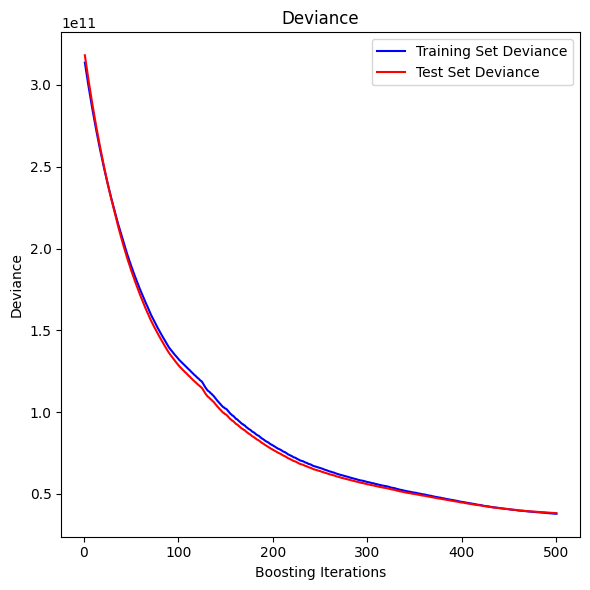

In [ ]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

Plotting Feature Importance

/tmp/ipython-input-96-2870956592.py:15: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



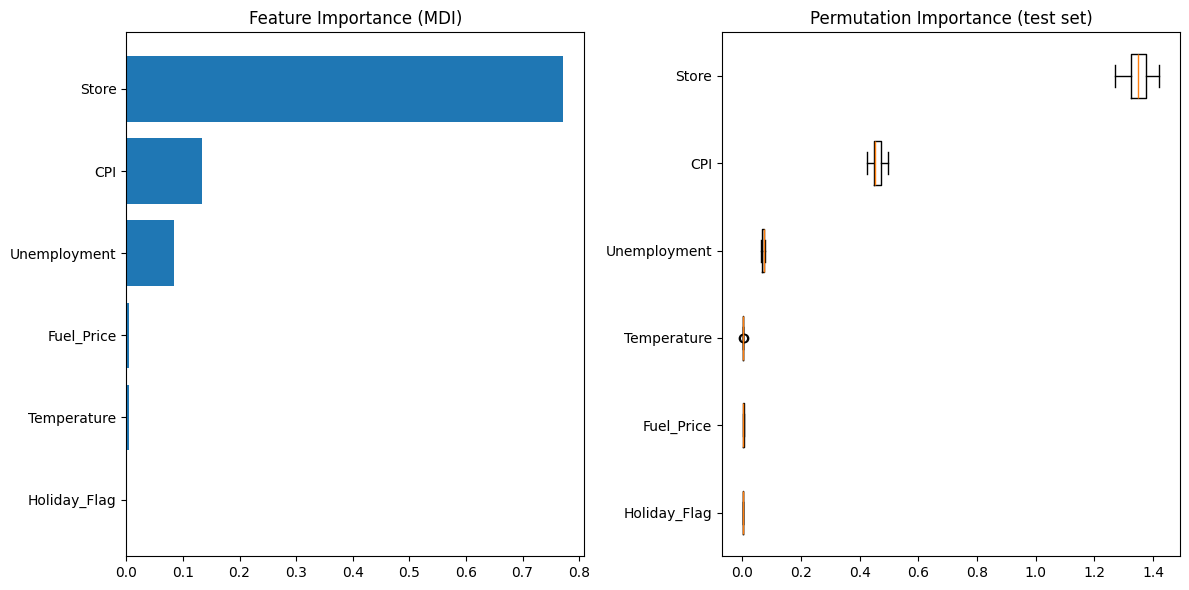

In [ ]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

2.RANDOM FOREST REGRESSOR

In [ ]:
clf = RandomForestRegressor(n_estimators=1000, max_depth=None,
    min_samples_split=2, random_state=0, n_jobs = -1, oob_score = True)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

np.float64(-0.9322925494377049)

In [ ]:
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, oob_score=True,
                      random_state=0)

prediction of data

In [ ]:
forest = clf.predict(X_test)

In [ ]:
r2_score_forest = r2_score(y_test, forest)
print('r2_score prediction:', r2_score_forest)

r2_score prediction: 0.9334941110758923


In [ ]:
forest_training = clf.predict(X_train)

In [ ]:
print('r2_score training:', r2_score(y_train, forest_training))

r2_score training: 0.9907522367790873


In [ ]:
# Assuming 'y_test' and 'forest' are numpy arrays, create a DataFrame
df_plot = pd.DataFrame({'y_test': y_test, 'pred': forest})

fig = px.scatter(
    df_plot, x='y_test', y='pred', opacity=0.85,  # Use the new DataFrame
    trendline='ols', trendline_color_override='darkblue'
)
fig.update_xaxes(title = 'Actual')
fig.update_yaxes(title = 'Predicted')
fig.update_layout(title = 'Random Forest Regression Model', width =800, height = 500)
fig.show()

In [ ]:
clf.feature_importances_

array([0.67004299, 0.0036331 , 0.02982574, 0.02543006, 0.16894414,
       0.10212398])

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/tmp/ipython-input-105-2243646022.py:15: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



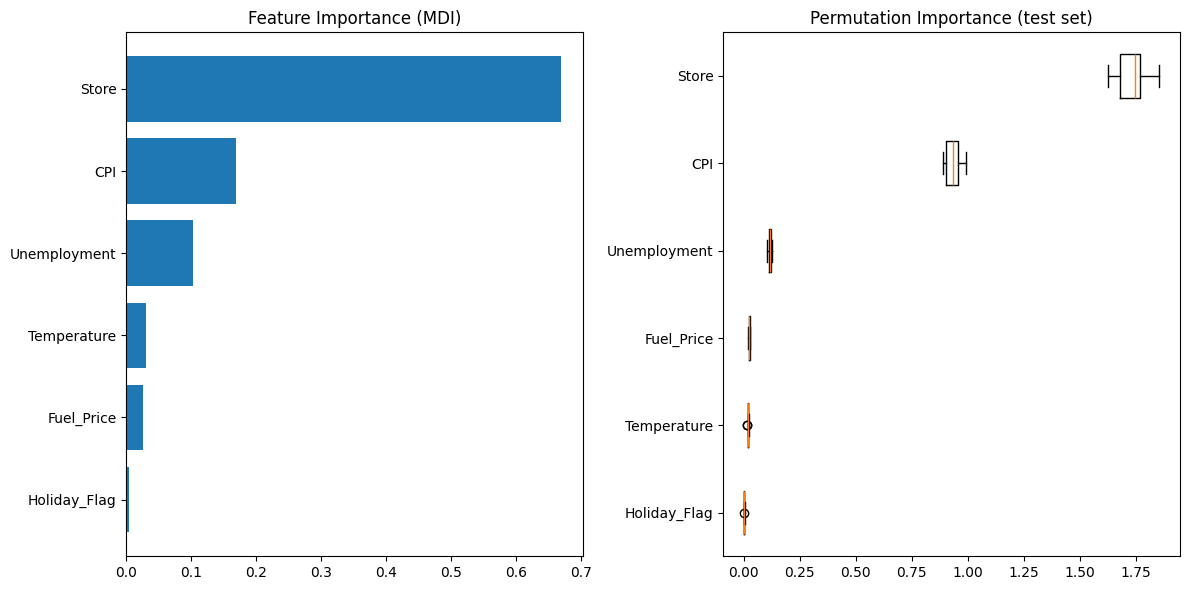

In [ ]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()


Model Comparison

In [ ]:
comparison = pd.DataFrame()

comparison['Type'] = ['Gradient Boosting Regressor', 'Random Forest Regressor']
comparison['r2 Score'] = [r2_score_gb, r2_score_forest]
comparison

,Type,r2 Score
0,Gradient Boosting Regressor,0.881268
1,Random Forest Regressor,0.933494


In [ ]:
fig = px.bar(comparison, x = 'Type', y = 'r2 Score', text = 'r2 Score', title = 'Comparison of Model Based on r2 Score')
fig.update_xaxes(title = 'Models')
fig.update_traces(marker_color = ['salmon', 'orchid'] )
fig.show()

After comparing the model we find that Random Forest Regressor performs the best. So, we’ll use Random Forest Regressor to weekly sale predictions with forest. predict(). This process helps us choose the most accurate model for predicting.

In [ ]:
X_test.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,
2010-03-12,18,0,42.39,2.805,131.784000,9.202
2011-06-24,24,0,68.88,3.964,135.265267,8.212
2011-10-28,2,0,65.87,3.372,217.325182,7.441
2011-11-11,26,0,40.08,3.570,136.461806,7.598
2010-03-19,36,0,59.56,2.701,209.980321,8.554


In [ ]:
input_data = (26, 0, 40.08, 3.570, 136.461806, 7.598)
#input_data_as_numpy_array = np.asarray(input_data)
#input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#prediction = regressor.predict(input_data_reshaped)
#print(prediction)
#print("The initial value is ",prediction[0])
print("The sales for the fourth product in the dataset is predicted as ", forest[3])

The sales for the fourth product in the dataset is predicted as  950440.5835199942


In [ ]:
y_test.iloc[3]

np.float64(1077640.13)

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
data = pd.read_csv('/Walmart Data Analysis and Forcasting (1).csv')
# Basic preprocessing (customize based on actual columns)
data['Date'] = pd.to_datetime(data['Date'], format='%y-%m-%d')
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week
data['Year'] = data['Date'].dt.year

# Drop unnecessary columns
data.drop(['Date'], axis=1, inplace=True)

# Handle missing values
data.fillna(0, inplace=True)

# Define features and target
X = data.drop(['Weekly_Sales'], axis=1)
y = data['Weekly_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# XGBoost Regressor
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

ValueError: unconverted data remains when parsing with format "%y-%m-%d": "10", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
df.head(

)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Load dataset
data = pd.read_csv('/Walmart Data Analysis and Forcasting (1).csv')

# Parse date
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # safer date conversion

# Feature extraction
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week
data['Year'] = data['Date'].dt.year

# Drop original Date
data.drop(['Date'], axis=1, inplace=True)

# Handle missing values
data.fillna(0, inplace=True)

# Feature-target split
X = data.drop(['Weekly_Sales'], axis=1)
y = data['Weekly_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # time-based
)

# XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    objective='reg:squarederror',  # recommended for regression
    random_state=42
)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")


RMSE: 540758.53


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: -0.9320
